# Dataset Cleaning and Merging

by Nan BAI

In [1]:
import json
import pandas as pd
import numpy as np
from argparse import Namespace
from collections import Counter
import pickle
import os
import urllib

args = Namespace(
    # Data and Path information
    save_dir = 'data_storage/',
    image_dir = 'data_storage/images/'
)

## For Small Dataset of Venice

### Data Imports

In [915]:
size_df = pd.read_csv('Venezia/data_storage/images/photos_sizes.csv',sep='\t').rename(columns={'Unnamed: 0':'index'})

The small data has a maximum index of 5000 during the data collection period

In [916]:
size_df['index'] = size_df['index'].astype(str)

In [917]:
len(size_df['index'].unique())

5000

Only the data with downloadable marks are kept for further analysis

In [918]:
df = size_df[size_df['candownload']==1]

In [919]:
df

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,comments,taken,views,people,tags,lat,lon,neighbourhood,url
3,51870743082,1,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",0,2021-10-05 14:45:41,8,0,"[{'id': '47908950-51870743082-128896', 'author...",45.438413,12.318019,Piazzale Roma,https://www.flickr.com/photos/ruudi/51870743082/
4,51871789478,1,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",0,2021-10-05 14:46:05,2,0,"[{'id': '47908950-51871789478-128896', 'author...",45.438405,12.318063,Piazzale Roma,https://www.flickr.com/photos/ruudi/51871789478/
5,51870742942,1,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",0,2021-10-05 15:13:13,6,0,"[{'id': '47908950-51870742942-128896', 'author...",45.438802,12.319472,Piazzale Roma,https://www.flickr.com/photos/ruudi/51870742942/
6,51870380541,1,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,64148082@N02,NaN,VENEZIA. CARNEVALE 2019,IL CAVALIERE DALLO SGUARDO TORVO\n\n\nIl Carne...,3,2019-02-28 14:11:02,378,0,[],45.433650,12.339427,San Marco,https://www.flickr.com/photos/64148082@N02/518...
13,51863124066,1,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,186704588@N07,NaN,Venice - Ponte dei Sospiri,Ponte dei Sospiri. Il ponte dei Sospiri fu rea...,3,2022-01-20 18:14:39,242,0,"[{'id': '186683258-51863124066-11002', 'author...",45.433686,12.341019,San Marco,https://www.flickr.com/photos/glolucach/518631...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,51233430558,1,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,83293103@N00,"Milano, Italy",20210520_145859,NaN,0,2021-05-20 14:58:59,3,0,"[{'id': '6752254-51233430558-36842', 'author':...",45.428733,12.357844,Quartiere S. Elena,https://www.flickr.com/photos/badswan/51233430...
4982,51234286630,1,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,83293103@N00,"Milano, Italy",20210520_145745,NaN,0,2021-05-20 14:57:46,5,0,"[{'id': '6752254-51234286630-36842', 'author':...",45.428886,12.357227,Castello,https://www.flickr.com/photos/badswan/51234286...
4983,51234294135,1,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,83293103@N00,"Milano, Italy",20210520_164727,NaN,0,2021-05-20 16:47:27,12,0,"[{'id': '6752254-51234294135-36842', 'author':...",45.428200,12.357805,Quartiere S. Elena,https://www.flickr.com/photos/badswan/51234294...
4984,51234291635,1,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,83293103@N00,"Milano, Italy",20210520_155646,NaN,0,2021-05-20 15:56:46,11,0,"[{'id': '

### Data Cleaning and Processing

#### Finding Locals and Neighbourhoods

The data are distributed in 33 different neighbourhoods in Venice, posted by 331 different owners, among which 5 are local Venician people, due to their indicated locations in Flickr user profile, who contributed 24 posts

In [920]:
df['neighbourhood'].unique()

array(['Piazzale Roma', 'San Marco', 'Murano', 'Rialto', 'Dorsoduro',
       'Città Giardino', 'Sestière di San Polo', 'Cannaregio',
       'San Giuliano - Venezia', nan, 'San Clemente', 'Venice',
       'San Giorgio Maggiore', 'Venice-Lido', 'Santa Croce', 'Castello',
       'Giudecca', 'Quartiere S. Elena', 'Quartiere San Giacomo',
       'Quartiere Campo di Marte', "Sant'Elena",
       'San Lazzaro degli Armeni', 'Malamocco', 'Moranzani', 'Tessera',
       'Passo Campalto', "Sant'Erasmo", 'Le Vignole',
       'San Francesco del Deserto', 'San Nicolò di Lido',
       'Quattro Fontane', 'San Croce', 'San Polo'], dtype=object)

In [921]:
len(df['neighbourhood'].unique())

33

In [922]:
df['owner_loc'].unique()

array(['Tallinn, Estonia', nan, 'Valencia, España', 'Venezia, ITALIA',
       'Portugal', 'Niedersachsen, Deutschland',
       'Mogliano Veneto, Italia', 'Guelph, Canada', 'Deutschland',
       'Errenteria.', 'Texas, USA', 'NICE, France', 'France',
       'Newton, MA, USA', 'London, UK', 'Virginia, USA', 'Michigan, USA',
       'Brunswick, Maine, USA', 'Schiedam, Netherlands',
       'Arlington, Massachusetts, USA', 'Bologna, Italia',
       'Venezia, Italy', 'Milano', 'Garmisch, Germany',
       'Tilburg, Netherlands', 'Lausanne, Switzerland',
       'Freiburg, Germany', 'Trieste, Italia', 'Lecco, Italia',
       'Bordeaux, France', 'Darwin, Australia', 'Naaldwijk, Netherlands',
       'Italy', 'Seattle', 'Salzburg - Vienna, Austria', 'PAVIA, ITALIA',
       'Kentucky, USA', 'Feltre, Italia', 'Italia', 'Udine, Italia',
       'Toulouse, France', 'Venezia, Italia', 'Basel, Switzerland',
       'Marcon, Italia', 'Prague, Czech Republic', 'Antibes, France',
       'Roma', 'Torvaianica  (

In [18]:
locations = [now for now in list(df['owner_loc'].unique()) if 'venice' in str(now).lower() and 'USA' not in str(now).lower() or 'venezia' in str(now).lower()]
locations

['Venezia, ITALIA',
 'Venezia, Italy',
 'Venezia, Italia',
 'Venezia, Mestre',
 'San Donà di Piave  (Venezia), Italia']

In [19]:
df['local'] = df['owner_loc'].apply(lambda x: x in locations)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\1482302024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local'] = df['owner_loc'].apply(lambda x: x in locations)


In [857]:
len(df[df['local']]['owner'].unique())

5

In [858]:
len(df[df['local']])

24

In [856]:
len(df['owner'].unique())

330

#### Processing Tags and Converting to lists

In [26]:
import re
re.findall(r'_content\': \'([a-zA-Z]+)',df['tags'].iloc[0])

['adriaticsea', 'italy', 'venice', 'bridge', 'water']

In [27]:
df['tag_list'] = df['tags'].apply(lambda x: re.findall(r'_content\': \'([a-zA-Z]+)',x))

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\1574953216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag_list'] = df['tags'].apply(lambda x: re.findall(r'_content\': \'([a-zA-Z]+)',x))


In [28]:
df['tag_len'] = df['tag_list'].apply(lambda x: len(x))

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\1455675285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag_len'] = df['tag_list'].apply(lambda x: len(x))


#### Filtering out Erotic images

In [109]:
df['NOT'] = df['tag_list'].apply(lambda x: 'erotic' in x)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\4184844319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NOT'] = df['tag_list'].apply(lambda x: 'erotic' in x or 'nude' in x)


In [597]:
df = df[~df['NOT']]

#### Generating Timestamps for the posts

In [39]:
df['year'] = df['taken'].apply(lambda x: int(x[:4]))

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\40314514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['taken'].apply(lambda x: int(x[:4]))


In [49]:
df['time'] = df['taken'].apply(pd.Timestamp)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\3965765013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['taken'].apply(pd.Timestamp)


In [62]:
df['week'] = df['time'].apply(lambda x: x.week)

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\1498983366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['time'].apply(lambda x: x.week)


In [65]:
df['unique_week'] = df['year'] * 100 + df['week']

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\3367497227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique_week'] = df['year'] * 100 + df['week']


In [69]:
len(df['unique_week'].unique())

273

In [41]:
df['year'].unique()

array([2021, 2019, 2022, 2020, 2017, 2011, 2018, 1983, 2015, 1981, 2016,
       2008, 1995, 2007, 2013, 1971, 2009, 1963, 1954, 2012, 2014, 2010,
       1973, 2004, 1958, 2005, 2006, 1974, 2003, 1991], dtype=int64)

In [849]:
df

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,neighbourhood,url,local,tag_list,tag_len,NOT,year,time,week,unique_week
3,51870743082,1,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,Piazzale Roma,https://www.flickr.com/photos/ruudi/51870743082/,False,"[adriaticsea, italy, venice, bridge, water]",5,False,2021,2021-10-05 14:45:41,40,202140
4,51871789478,1,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,Piazzale Roma,https://www.flickr.com/photos/ruudi/51871789478/,False,"[adriaticsea, italy, venice]",3,False,2021,2021-10-05 14:46:05,40,202140
5,51870742942,1,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,Piazzale Roma,https://www.flickr.com/photos/ruudi/51870742942/,False,"[adriaticsea, italy, venice, water]",4,False,2021,2021-10-05 15:13:13,40,202140
6,51870380541,1,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,64148082@N02,NaN,VENEZIA. CARNEVALE 2019,IL CAVALIERE DALLO SGUARDO TORVO\n\n\nIl Carne...,...,San Marco,https://www.flickr.com/photos/64148082@N02/518...,False,[],0,False,2019,2019-02-28 14:11:02,9,201909
13,51863124066,1,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,186704588@N07,NaN,Venice - Ponte dei Sospiri,Ponte dei Sospiri. Il ponte dei Sospiri fu rea...,...,San Marco,https://www.flickr.com/photos/glolucach/518631...,False,"[ponte, pont, canal, river, city, history, cul...",16,False,2022,2022-01-20 18:14:39,3,202203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,51233430558,1,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,83293103@N00,"Milano, Italy",20210520_145859,NaN,...,Quartiere S. Elena,https://www.flickr.com/photos/badswan/51233430...,False,"[biennale, architettura, architecture, venezia...",5,False,2021,2021-05-20 14:58:59,20,202120
4982,51234286630,1,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,83293103@N00,"Milano, Italy",20210520_145745,NaN,...,Castello,https://www.flickr.com/photos/badswan/51234286...,False,"[biennale, architettura, architecture, venezia...",5,False,2021,2021-05-20 14:57:46,20,202120
4983,51234294135,1,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,83293103@N00,"Milano, Italy",20210520_164727,NaN,...,Quartiere S. Elena,https://www.flickr.com/photos/badswan/51234294...,False,"[biennale, architettura, architecture, venezia...",5,False,2021,2021-05-20 16:47:27,20,202120
4984,51234291635,1,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,83293103@N00,"Milano, Italy",20210520_155646,NaN,...

### Creating a New Dataset of data with text descriptions

#### Filtering out an initial subset with text descriptions

In total, 2801 out of 2951 complete posts have at least one text field (description, title, or tags) that is not empty.

In [70]:
df_new = df[~((df['description'].isnull())&(df['title'].isnull())&(df['tag_len']==0))]
df_new

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,neighbourhood,url,local,tag_list,tag_len,NOT,year,time,week,unique_week
3,51870743082,1,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,Piazzale Roma,https://www.flickr.com/photos/ruudi/51870743082/,False,"[adriaticsea, italy, venice, bridge, water]",5,False,2021,2021-10-05 14:45:41,40,202140
4,51871789478,1,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,Piazzale Roma,https://www.flickr.com/photos/ruudi/51871789478/,False,"[adriaticsea, italy, venice]",3,False,2021,2021-10-05 14:46:05,40,202140
5,51870742942,1,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,Piazzale Roma,https://www.flickr.com/photos/ruudi/51870742942/,False,"[adriaticsea, italy, venice, water]",4,False,2021,2021-10-05 15:13:13,40,202140
6,51870380541,1,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,64148082@N02,NaN,VENEZIA. CARNEVALE 2019,IL CAVALIERE DALLO SGUARDO TORVO\n\n\nIl Carne...,...,San Marco,https://www.flickr.com/photos/64148082@N02/518...,False,[],0,False,2019,2019-02-28 14:11:02,9,201909
13,51863124066,1,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,186704588@N07,NaN,Venice - Ponte dei Sospiri,Ponte dei Sospiri. Il ponte dei Sospiri fu rea...,...,San Marco,https://www.flickr.com/photos/glolucach/518631...,False,"[ponte, pont, canal, river, city, history, cul...",16,False,2022,2022-01-20 18:14:39,3,202203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,51233430558,1,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,83293103@N00,"Milano, Italy",20210520_145859,NaN,...,Quartiere S. Elena,https://www.flickr.com/photos/badswan/51233430...,False,"[biennale, architettura, architecture, venezia...",5,False,2021,2021-05-20 14:58:59,20,202120
4982,51234286630,1,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,83293103@N00,"Milano, Italy",20210520_145745,NaN,...,Castello,https://www.flickr.com/photos/badswan/51234286...,False,"[biennale, architettura, architecture, venezia...",5,False,2021,2021-05-20 14:57:46,20,202120
4983,51234294135,1,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,83293103@N00,"Milano, Italy",20210520_164727,NaN,...,Quartiere S. Elena,https://www.flickr.com/photos/badswan/51234294...,False,"[biennale, architettura, architecture, venezia...",5,False,2021,2021-05-20 16:47:27,20,202120
4984,51234291635,1,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,83293103@N00,"Milano, Italy",20210520_155646,NaN,...

In [101]:
df_new['description'] = df_new['description'].fillna('')
df_new['title'] = df_new['title'].fillna('')

Merging the three types of text data into one complete paragraph with the order of description -> title -> tags.

In [302]:
df_new['text_data'] = df_new.apply(lambda x: str(x['description']) + '. It has title of ' + str(x['title']) + '. It has tags of ' + ', '.join(x['tag_list']), axis=1)

In [303]:
df_new['text_data']

3       Venice, Italy. It has title of .... It has tag...
4       Venice, Italy. It has title of .... It has tag...
5       Venice, Italy. It has title of .... It has tag...
6       IL CAVALIERE DALLO SGUARDO TORVO\n\n\nIl Carne...
13      Ponte dei Sospiri. Il ponte dei Sospiri fu rea...
                              ...                        
4981    . It has title of 20210520_145859. It has tags...
4982    . It has title of 20210520_145745. It has tags...
4983    . It has title of 20210520_164727. It has tags...
4984    . It has title of 20210520_155646. It has tags...
4985    . It has title of 20210520_155525. It has tags...
Name: text_data, Length: 2801, dtype: object

Only 1952 out of the 2801 text data are unique to each other, i.e., not repetitive.

In [304]:
len(df_new['text_data'].unique())

1952

#### Filtering out a sub-dataset with unique text data

Only the *FIRST* data point is kept while there are duplicates

In [305]:
candidates = df_new.drop_duplicates(subset='text_data',keep='first')
len(candidates)

1952

### Detecting Different Languages in the Texts and Translating all to English

#### Library Imports with Google Translator API

In [418]:
from langdetect import detect
from deep_translator import GoogleTranslator

In [420]:
translated = GoogleTranslator(source='auto', target='en').translate("io bevo uno cappucino")
translated

'I drink a cappucino'

In [426]:
translated = GoogleTranslator(source='auto', target='en').translate('Verso la laguna')
translated

'Towards the lagoon'

In [243]:
detect(candidates['text_data'].iloc[4])

'it'

#### Text normalization and processing, Detecting Languages, and Performing Translations

A new sentence occur when there is a period(.), exclamation mark(!), question mark(?) or semi-colon(;). The html signs, http addresses, formating elements of the texts, special quotation marks, and copyright symbol is removed. Only a sentence piece with no less than 3 words are considered for translation task.

Italian is distinguished from the other non-English texts.

In [622]:
candi_dict_en = {}
candi_dict_it = {}
candi_dict_it_trans = {}
candi_dict_other = {}
candi_dict_other_trans = {}
origin_en = []
origin_it = []
origin_other = []
origin_other_lan = []
for i in candidates['text_data'].index:
    for sent in candidates['text_data'][i].replace('St.', 'St').replace('S.', 'S').replace('!', '.').replace('?', '.').replace(';', '.').split('. '):
        try:
            sent = re.sub(r'\<.*\>', '', sent)
            sent = re.sub(r'http[s]?://\S+', '', sent)
            sent = re.sub(r'--+', '', sent)
            sent = re.sub(r'\*+', '', sent)
            sent = sent.replace('\n', ' ').replace('&quot', '').replace('&amp', '').replace('#', '').replace('\\','')
            sent = sent.replace('“', ' ').replace('„', ' ').replace('”', ' ')
            sent = sent.replace('©', '')
            for senty in sent.split('. '):
                tt = 0
                if len(senty.split())<3:
                    continue
                if senty.startswith('It has title of') or senty.startswith('It has tags of'):
                    senti = ' '.join(senty.split()[4:])
                    tt = 1
                else:
                    senti = senty
                if detect(senti)=='en' and senty.strip() not in candi_dict_en:
                    candi_dict_en[len(candi_dict_en)] = senty.strip()
                    origin_en.append(i)
                elif detect(senti)=='it' and senty.strip() not in candi_dict_it:
                    candi_dict_it[len(candi_dict_it)] = senty.strip()
                    if tt==1:
                        candi_dict_it_trans[len(candi_dict_it_trans)] = ' '.join(senty.split()[:4]) + ' ' + GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    else:
                        candi_dict_it_trans[len(candi_dict_it_trans)] = GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    origin_it.append(i)
                elif detect(senti)!='it' and detect(senti)!='en' and senty.strip() not in candi_dict_other:
                    candi_dict_other[len(candi_dict_other)] = senty.strip()
                    if tt==1:
                        candi_dict_other_trans[len(candi_dict_other_trans)] = ' '.join(senty.split()[:4]) + ' ' + GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    else:
                        candi_dict_other_trans[len(candi_dict_other_trans)] = GoogleTranslator(source='auto', target='en').translate(senti.strip())
                    origin_other.append(i)
                    origin_other_lan.append(detect(senty))
        except Exception as e:
            print(e)
            continue

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features in text.
No features i

In total, 754, 1246, and 926 sentences are detected as English, Italian, and Other languages, respectively. After filtering out text data with less than 3 words, 1913 out of 1952 sentences remained.

In [850]:
len(set(origin_en)), len(set(origin_it)), len(set(origin_other)), len(set(origin_en).union(set(origin_it)).union(set(origin_other)))

(754, 1246, 926, 1913)

#### Filtering out Non-relevant Text data for Heritage Values and Attributes

The stop word list includes camera brands, file names, advertisements, and place-holder formats for specific types of data (e.g., scanned from analog).

In [625]:
stoplist = ['sony', 'canon ', 'iphone','dilution','chesterton','leica','nikon','fuji','img','buy','steam','rolleiflex','ilford',
            'sigma','e6', 'click', 'gear','luminance','fs','mercedes','spp','actv','atvo','samyang','thank','notes','twitter',
            'gaz','oebb','follow','scan','voightlander','dsc', 'm1x', 'p10', 'f21', 'dhg', 'd01','l10', '_mg', '[','psx', 'zmr',
            'discount', 'c_','shot','imag1','imag2']

In [626]:
filter_dict_en = {}
filter_dict_it = {}
filter_dict_other = {}

In [627]:
origindicts = [candi_dict_en, candi_dict_it_trans, candi_dict_other_trans]
targdicts = [filter_dict_en, filter_dict_it, filter_dict_other]

In [628]:
for i in range(len(origindicts)):
    dic1 = origindicts[i]
    dic2 = targdicts[i]
    for k,v in dic1.items():
        record = 1
        if v.startswith('It has tags of'):
            dic2[k] = v
        elif v.startswith('It has title of'):
            for w in stoplist:
                if ' '.join(v.lower().split()[4:]).startswith(w) or ' '.join(v.lower().split()[4:])[:4].isdigit():
                    record = 0
                    print(k,v,w)
                    break
            if record==1:
                dic2[k] = v
        else:
            for w in stoplist:
                if v.lower().startswith(w) or v[:5].isdigit():
                    record = 0
                    print(k,v,w)
                    break
            if record==1:
                dic2[k] = v

7 CANON EOS 6D Mark II con ob canon 
8 CANON EF 70-300 f./4-5,6 IS USM canon 
29 CANON EOS 6D Mark II con ob canon 
30 CANON EF 24-85 f./3,5-4,5 USM canon 
56 Scanner (Kodak Slide n Scan) from Kodacolor negative scan
57 It has title of 1983-01 European Trafalgar Tour  Italy, Venice IMAG0706.jpg sony
100 It has title of 1981 European Trafalgar tour 203 Venice, Italy IMAG 0229.jpg sony
102 It has title of 1981 European Trafalgar tour 202 Venice, Italy IMAG 0228.jpg sony
104 Scanner (Kodak Slide n scan) from Kodachrome slide scan
105 It has title of 1981 European Trafalgar tour 201 Venice, Italy IMAG 0227.jpg sony
108 Scanner (Kodak Slide n scan) from Kodachrome slide scan
109 It has title of 1981 European Trafalgar tour 200 Venice, Italy IMAG 0226.jpg sony
112 It has title of 1981 European Trafalgar tour 199 Venice, Italy IMAG 0225.jpg sony
114 It has title of 1981 European Trafalgar tour 196 Venice, Italy IMAG 0222.jpg sony
116 It has title of 1981 European Trafalgar tour 195 Venice, It

After the filtering, 1761 out of 1913 data points remained as data with valid text description.

In [629]:
filter_en = [origin_en[k] for k in filter_dict_en]
filter_it = [origin_it[k] for k in filter_dict_it]
filter_other = [origin_other[k] for k in filter_dict_other]

In [851]:
len(set(filter_en)), len(set(filter_it)), len(set(filter_other)), len(set(filter_en).union(set(filter_it)).union(set(filter_other)))

(640, 1215, 657, 1761)

#### A Text-only Dataset with separate sentences

In [840]:
filter_df_en = pd.DataFrame()
filter_df_en['sentence'] = pd.Series(filter_dict_en)
filter_df_en['origin'] = filter_en
filter_df_en['lang'] = 'en'

In [842]:
filter_df_it = pd.DataFrame()
filter_df_it['sentence'] = pd.Series(filter_dict_it)
filter_df_it['origin'] = filter_it
filter_df_it['lang'] = 'it'

In [843]:
filter_df_other = pd.DataFrame()
filter_df_other['sentence'] = pd.Series(filter_dict_other)
filter_df_other['origin'] = filter_other
filter_df_other['lang'] = 'other'

In total, 4557 sentences coming from 1761 original posts are saved for further text analysis

In [846]:
sentences = pd.concat([filter_df_en,filter_df_it,filter_df_other]).reset_index()

In [861]:
len(sentences['origin'].unique())

1761

In [860]:
sentences

,index,sentence,origin,lang
0,0,"It has tags of adriaticsea, italy, venice, bri...",3,en
1,1,"It has tags of adriaticsea, italy, venice",4,en
2,2,"It has tags of adriaticsea, italy, venice, water",5,en
3,3,THE KNIGHT WITH A GRIM LOOK The Carnival of ...,6,en
4,4,Who has never heard of it,6,en
...,...,...,...,...
4552,1228,"It has tags of venice, murano",4837,other
4553,1229,"It has tags of venice, murano",4838,other
4554,1230,"It has title of Gondolas on Canale Grande, Venice",4842,other
4555,1231,It has title of Frontage,4857,other


#### Finalizing the new Subset with valid textual data

In [631]:
candidates_new = candidates.loc[list(set(filter_en).union(set(filter_it)).union(set(filter_other)))]

In [632]:
candidates_new

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,url,local,tag_list,tag_len,NOT,year,time,week,unique_week,text_data
3,51870743082,1,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,https://www.flickr.com/photos/ruudi/51870743082/,False,"[adriaticsea, italy, venice, bridge, water]",5,False,2021,2021-10-05 14:45:41,40,202140,"Venice, Italy. It has title of .... It has tag..."
4,51871789478,1,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,https://www.flickr.com/photos/ruudi/51871789478/,False,"[adriaticsea, italy, venice]",3,False,2021,2021-10-05 14:46:05,40,202140,"Venice, Italy. It has title of .... It has tag..."
5,51870742942,1,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,https://www.flickr.com/photos/ruudi/51870742942/,False,"[adriaticsea, italy, venice, water]",4,False,2021,2021-10-05 15:13:13,40,202140,"Venice, Italy. It has title of .... It has tag..."
6,51870380541,1,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,64148082@N02,NaN,VENEZIA. CARNEVALE 2019,IL CAVALIERE DALLO SGUARDO TORVO\n\n\nIl Carne...,...,https://www.flickr.com/photos/64148082@N02/518...,False,[],0,False,2019,2019-02-28 14:11:02,9,201909,IL CAVALIERE DALLO SGUARDO TORVO\n\n\nIl Carne...
4106,51750158296,1,https://live.staticflickr.com/65535/5175015829...,https://live.staticflickr.com/65535/5175015829...,https://live.staticflickr.com/65535/5175015829...,https://live.staticflickr.com/65535/5175015829...,81438595@N00,NaN,"Rialto Bridge, Venice, Italy, 1971",Scanned from a half frame Kodachrome slide (tr...,...,https://www.flickr.com/photos/east_med_wandere...,False,"[italy, venice, rialtobridge, kodachrome, worl...",5,False,1971,1971-01-01 00:00:00,53,197153,Scanned from a half frame Kodachrome slide (tr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,51813044138,1,https://live.staticflickr.com/65535/5181304413...,https://live.staticflickr.com/65535/5181304413...,https://live.staticflickr.com/65535/5181304413...,https://live.staticflickr.com/65535/5181304413...,61033692@N00,NaN,Piove,"Venice, Italy",...,https://www.flickr.com/photos/magellano/518130...,False,"[venezia, venice, venise, venedig, piazza, san...",16,False,2022,2022-01-05 18:56:59,1,202201,"Venice, Italy. It has title of Piove. It has t..."
4058,51812495828,1,https://live.staticflickr.com/65535/5181249582...,https://live.staticflickr.com/65535/5181249582...,https://live.staticflickr.com/65535/5181249582...,https://live.staticflickr.com/65535/5181249582...,126584084@N05,Deutschland,"slowly, quietly, Venezia","slowly, quietly ( langsam, leise ) in einer Au...",...,https://www.flickr.com/photos/126584084@N05/51...,False,[venezia],1,False,2017,2017-09-03 13:02:45,35,201735,"slowly, quietly ( langsam, leise ) in einer Au..."
4075,51757171151,1,https://live.staticflickr.com/65535/5175717115...,https://live.staticflickr.com/65535/5175717115...,https://live.staticflickr.com/65535/5175717115...,https://live.staticflickr.com/65535/5175717115...,61579728@N05,"London, UK",2021-11-FL-2111 Biennale Architecture Venice-6,,...,https://www.flickr.com/photos/acme_/51757171151/,False,"[architecturebiennale, biennale, exhibition, g...",7,False,2021,2021-11-19 18:0

In [633]:
candidates_new['Italian'] = 0
candidates_new['English'] = 0
candidates_new['Other_Lang'] = 0
candidates_new['Italian'].loc[list(set(filter_it))] = 1
candidates_new['English'].loc[list(set(filter_en))] = 1
candidates_new['Other_Lang'].loc[list(set(filter_other))] = 1

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\2582107276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_new['Italian'].loc[list(set(filter_it))] = 1
C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\2582107276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_new['English'].loc[list(set(filter_en))] = 1
C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\2582107276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

#### Some Statistical Facts of the Subset

Number of unique timestamps (273->265), owners (330->309), and neighbourhoods (33->30) all drop a little bit in the subset compared to the original complete dataset

<AxesSubplot:>

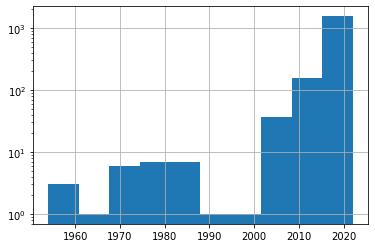

In [852]:
candidates_new['year'].hist(log=True)

In [853]:
len(candidates_new['unique_week'].unique())

265

In [854]:
len(candidates_new['owner'].unique())

309

In [855]:
len(candidates_new['neighbourhood'].unique())

30

#### Merging the translated texts back to a Revised version of text data

The data are merged back in the order of English, translated Italian, and translated other languages

In [634]:
rev = {}
keys_en = list(filter_dict_en.keys())
keys_it = list(filter_dict_it.keys())
keys_other = list(filter_dict_other.keys())
for i in range(len(filter_en)):
    if not filter_en[i] in rev:
        rev[filter_en[i]] = filter_dict_en[keys_en[i]]
    else:
        rev[filter_en[i]] = '. '.join([rev[filter_en[i]], filter_dict_en[keys_en[i]]])
        
for i in range(len(filter_it)):
    if not filter_it[i] in rev:
        rev[filter_it[i]] = filter_dict_it[keys_it[i]]
    else:
        rev[filter_it[i]] = '. '.join([rev[filter_it[i]], filter_dict_it[keys_it[i]]])
        
for i in range(len(filter_other)):
    if not filter_other[i] in rev:
        rev[filter_other[i]] = filter_dict_other[keys_other[i]]
    else:
        rev[filter_other[i]] = '. '.join([rev[filter_other[i]], filter_dict_other[keys_other[i]]])

In [635]:
candidates_new['revised_text'] = pd.Series(rev)

In [636]:
candidates_new['text_len'] = candidates_new['revised_text'].apply(lambda x: len(x.split()))
candidates_new['num_sent'] = candidates_new['revised_text'].apply(lambda x: len(x.split('. ')))

Distribution of words per sentence and sentences per data point

<AxesSubplot:>

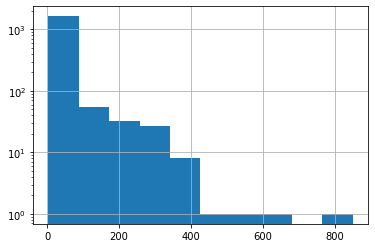

In [863]:
candidates_new['text_len'].hist(log=True)

<AxesSubplot:>

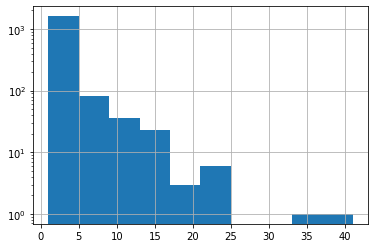

In [864]:
candidates_new['num_sent'].hist(log=True)

In [637]:
candidates_new

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,time,week,unique_week,text_data,Italian,English,Other_Lang,revised_text,text_len,num_sent
3,51870743082,1,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,2021-10-05 14:45:41,40,202140,"Venice, Italy. It has title of .... It has tag...",0,1,0,"It has tags of adriaticsea, italy, venice, bri...",9,1
4,51871789478,1,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,2021-10-05 14:46:05,40,202140,"Venice, Italy. It has title of .... It has tag...",0,1,0,"It has tags of adriaticsea, italy, venice",7,1
5,51870742942,1,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,2021-10-05 15:13:13,40,202140,"Venice, Italy. It has title of .... It has tag...",0,1,0,"It has tags of adriaticsea, italy, venice, water",8,1
6,51870380541,1,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,64148082@N02,NaN,VENEZIA. CARNEVALE 2019,IL CAVALIERE DALLO SGUARDO TORVO\n\n\nIl Carne...,...,2019-02-28 14:11:02,9,201909,IL CAVALIERE DALLO SGUARDO TORVO\n\n\nIl Carne...,1,1,1,THE KNIGHT WITH A GRIM LOOK The Carnival of ...,222,9
4106,51750158296,1,https://live.staticflickr.com/65535/5175015829...,https://live.staticflickr.com/65535/5175015829...,https://live.staticflickr.com/65535/5175015829...,https://live.staticflickr.com/65535/5175015829...,81438595@N00,NaN,"Rialto Bridge, Venice, Italy, 1971",Scanned from a half frame Kodachrome slide (tr...,...,1971-01-01 00:00:00,53,197153,Scanned from a half frame Kodachrome slide (tr...,0,1,0,"It has title of Rialto Bridge, Venice, Italy, ...",9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,51813044138,1,https://live.staticflickr.com/65535/5181304413...,https://live.staticflickr.com/65535/5181304413...,https://live.staticflickr.com/65535/5181304413...,https://live.staticflickr.com/65535/5181304413...,61033692@N00,NaN,Piove,"Venice, Italy",...,2022-01-05 18:56:59,1,202201,"Venice, Italy. It has title of Piove. It has t...",1,0,0,"It has title of Rains. It has tags of venezia,...",25,2
4058,51812495828,1,https://live.staticflickr.com/65535/5181249582...,https://live.staticflickr.com/65535/5181249582...,https://live.staticflickr.com/65535/5181249582...,https://live.staticflickr.com/65535/5181249582...,126584084@N05,Deutschland,"slowly, quietly, Venezia","slowly, quietly ( langsam, leise ) in einer Au...",...,2017-09-03 13:02:45,35,201735,"slowly, quietly ( langsam, leise ) in einer Au...",0,1,1,"Biennale 2017 Venezia slowly, quietly in an e...",27,4
4075,51757171151,1,https://live.staticflickr.com/65535/5175717115...,https://live.staticflickr.com/65535/5175717115...,https://live.staticflickr.com/65535/5175717115...,https://live.staticflickr.com/65535/5175717115...,61579728@N05,"London, UK",2021-11-FL-2111 Biennale Architecture Venice-6,,...,2021-11-19 18:02:18,46,202146,. It has title of 2021-11-FL-2111 Biennale Arc...,0,0,1,"It has tags of architecturebiennale, biennale,...",11,1
4087,51783729807,1,https://live.staticflickr.com/65535/5178372980...,https://live.staticflickr.com/65535/5178372980...,https://live.staticflickr.com/65535/5178372980...,https://live.staticflickr.com/65535/5178372980...,141429878@N03,NaN,Murano -Venezia,,...,2

#### Merging the Revised Text data back to the full Dataset

Merging first back to the subset with text data and copy revised text data to the duplicates

In [638]:
cols_to_use = candidates_new.columns.difference(df_new.columns)
new = df_new.merge(candidates_new[cols_to_use], left_index=True, right_index=True, how='left')

In [639]:
text_dict = {}
for i in range(len(new)):
    if new.iloc[i]['text_data'] not in text_dict:
        text_dict[new.iloc[i]['text_data']] = new.iloc[i]['revised_text']

In [640]:
new['revised_text'] = new['text_data'].apply(lambda x: text_dict[x])

191 data points have a text data field, but do not have a revised text data field, since the texts they have are *invalid*

In [865]:
new[new['revised_text'].isna()]

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,time,week,unique_week,text_data,English,Italian,Other_Lang,num_sent,revised_text,text_len
132,51820580920,1,https://live.staticflickr.com/65535/5182058092...,https://live.staticflickr.com/65535/5182058092...,https://live.staticflickr.com/65535/5182058092...,https://live.staticflickr.com/65535/5182058092...,40575230@N05,NaN,"1981 European Trafalgar tour #203 Venice, Ital...",Scanner (Kodak Slide n scan) from Kodachrome s...,...,1981-11-01 00:00:00,44,198144,Scanner (Kodak Slide n scan) from Kodachrome s...,NaN,NaN,NaN,NaN,NaN,NaN
141,51818440638,1,https://live.staticflickr.com/65535/5181844063...,https://live.staticflickr.com/65535/5181844063...,https://live.staticflickr.com/65535/5181844063...,https://live.staticflickr.com/65535/5181844063...,129254222@N04,NaN,IMG_20211119_095036,,...,2021-11-19 09:50:36,46,202146,. It has title of IMG_20211119_095036. It has ...,NaN,NaN,NaN,NaN,NaN,NaN
142,51818666444,1,https://live.staticflickr.com/65535/5181866644...,https://live.staticflickr.com/65535/5181866644...,https://live.staticflickr.com/65535/5181866644...,https://live.staticflickr.com/65535/5181866644...,129254222@N04,NaN,IMG_20211119_113153,,...,2021-11-19 11:31:53,46,202146,. It has title of IMG_20211119_113153. It has ...,NaN,NaN,NaN,NaN,NaN,NaN
143,51817375982,1,https://live.staticflickr.com/65535/5181737598...,https://live.staticflickr.com/65535/5181737598...,https://live.staticflickr.com/65535/5181737598...,https://live.staticflickr.com/65535/5181737598...,129254222@N04,NaN,IMG_20211119_115156,,...,2021-11-19 11:51:56,46,202146,. It has title of IMG_20211119_115156. It has ...,NaN,NaN,NaN,NaN,NaN,NaN
144,51818666119,1,https://live.staticflickr.com/65535/5181866611...,https://live.staticflickr.com/65535/5181866611...,https://live.staticflickr.com/65535/5181866611...,https://live.staticflickr.com/65535/5181866611...,129254222@N04,NaN,IMG_20211119_120843,,...,2021-11-19 12:08:43,46,202146,. It has title of IMG_20211119_120843. It has ...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573,51594038030,1,https://live.staticflickr.com/65535/5159403803...,https://live.staticflickr.com/65535/5159403803...,https://live.staticflickr.com/65535/5159403803...,https://live.staticflickr.com/65535/5159403803...,10419801@N06,NaN,IMG_7913.jpg,,...,2021-10-10 18:52:36,40,202140,. It has title of IMG_7913.jpg. It has tags of,NaN,NaN,NaN,NaN,NaN,NaN
4574,51593363538,1,https://live.staticflickr.com/65535/5159336353...,https://live.staticflickr.com/65535/5159336353...,https://live.staticflickr.com/65535/5159336353...,https://live.staticflickr.com/65535/5159336353...,10419801@N06,NaN,IMG_7896.jpg,,...,2021-10-10 17:18:22,40,202140,. It has title of IMG_7896.jpg. It has tags of,NaN,NaN,NaN,NaN,NaN,NaN
4808,51320597675,1,https://live.staticflickr.com/65535/5132059767...,https://live.staticflickr.com/65535/5132059767...,https://live.staticflickr.com/65535/5132059767...,https://live.staticflickr.com/65535/5132059767...,22857403@N05,NaN,20210718_124440,,...,2021-07-18 12:44:40,28,202128,. It has title of 20210718_124440. It has tags...,NaN,NaN,NaN,NaN,NaN,NaN
4932,51228899889,1,https://live.staticflickr.com/65535/5122889988...,https://live.staticflickr.com/65535/5122889988...,https://live.staticflickr.com/65535/5122889988...,https://live.staticflickr.com/65535/5122889988...,85941441@N04,NaN,20210605_160458-01,,...,2021-06-05 16:04:58,22,202122,. It has title of 20210605_160458-01. It has t...,NaN,NaN,NaN,NaN,NaN,NaN


Merging then back to the full dataset

In [643]:
cols_to_use = new.columns.difference(df.columns)
final_df = df.merge(new[cols_to_use], left_index=True, right_index=True, how='left')

In [644]:
final_df

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,time,week,unique_week,English,Italian,Other_Lang,num_sent,revised_text,text_data,text_len
3,51870743082,1,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,2021-10-05 14:45:41,40,202140,1.0,0.0,0.0,1.0,"It has tags of adriaticsea, italy, venice, bri...","Venice, Italy. It has title of .... It has tag...",9.0
4,51871789478,1,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,2021-10-05 14:46:05,40,202140,1.0,0.0,0.0,1.0,"It has tags of adriaticsea, italy, venice","Venice, Italy. It has title of .... It has tag...",7.0
5,51870742942,1,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,2021-10-05 15:13:13,40,202140,1.0,0.0,0.0,1.0,"It has tags of adriaticsea, italy, venice, water","Venice, Italy. It has title of .... It has tag...",8.0
6,51870380541,1,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,https://live.staticflickr.com/65535/5187038054...,64148082@N02,NaN,VENEZIA. CARNEVALE 2019,IL CAVALIERE DALLO SGUARDO TORVO\n\n\nIl Carne...,...,2019-02-28 14:11:02,9,201909,1.0,1.0,1.0,9.0,THE KNIGHT WITH A GRIM LOOK The Carnival of ...,IL CAVALIERE DALLO SGUARDO TORVO\n\n\nIl Carne...,222.0
13,51863124066,1,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,186704588@N07,NaN,Venice - Ponte dei Sospiri,Ponte dei Sospiri. Il ponte dei Sospiri fu rea...,...,2022-01-20 18:14:39,3,202203,0.0,1.0,0.0,10.0,Bridge of Sighs. The Bridge of Sighs was built...,Ponte dei Sospiri. Il ponte dei Sospiri fu rea...,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,51233430558,1,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,83293103@N00,"Milano, Italy",20210520_145859,NaN,...,2021-05-20 14:58:59,20,202120,0.0,1.0,0.0,1.0,"It has tags of biennale, architecture, archite...",. It has title of 20210520_145859. It has tags...,9.0
4982,51234286630,1,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,83293103@N00,"Milano, Italy",20210520_145745,NaN,...,2021-05-20 14:57:46,20,202120,0.0,1.0,0.0,1.0,"It has tags of biennale, architecture, archite...",. It has title of 20210520_145745. It has tags...,9.0
4983,51234294135,1,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,83293103@N00,"Milano, Italy",20210520_164727,NaN,...,2021-05-20 16:47:27,20,202120,0.0,1.0,0.0,1.0,"It has tags of biennale, architecture, archite...",. It has title of 20210520_164727. It has tags...,9.0
4984,51234291635,1,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,https://live.staticflickr.com/65535/5123429163...,83293103@N00,"Milano, Italy",20210520_155646,Na

A few cases with super long text descriptions

In [651]:
final_df[final_df['num_sent']>20]['revised_text'].tolist()

['NOT ONLY THE SQUERO. The church is dedicated to the two Milanese martyrs Gervasio and Protasio (hence Trovaso) and was founded in the 9th century. As Giuseppe Tassini tells us, the church was built in the early days after the foundation of Venice, and immediately became a parish church. It was rebuilt in 1028 by the Barbarigo and Caravella families. From its foundation it was subjected to the authorities of the patriarchs of Grado and the bishops of Olivolo. Due to various controversies, a compromise was reached in 1041: both prelates would have elected and commanded the vicar of San Trovaso. This is an important testimony of the bad relations that existed in the Middle Ages between the Gradense clergy and the Venetian clergy. In 1105 the church was renovated. It collapsed in 1583 and from 1584 it was rebuilt in seven years. Completely renovated starting from 1585 in Palladian forms with a Greek cross plan, on the outside it has the particularity of having two almost identical facade

### Creating a one-hot Embedding for frequent Tags

#### Generating a tag dictionary with appearance counts

With the tags of the complete dataset

In [660]:
tag_dict = {}
for i in final_df.index:
    list_now = final_df.loc[i]['tag_list']
    for w in list_now:
        if not w in tag_dict:
            tag_dict[w] = {}
            tag_dict[w]['count'] = 1
            tag_dict[w]['origin'] = [i]
        else:
            tag_dict[w]['count'] += 1
            tag_dict[w]['origin'].append(i)

Or alternatively, with the tags from the subset of unique and valid text data

In [715]:
tag_dict = {}
for i in candidates_new.index:
    list_now = candidates_new.loc[i]['tag_list']
    for w in list_now:
        if not w in tag_dict:
            tag_dict[w] = {}
            tag_dict[w]['count'] = 1
            tag_dict[w]['origin'] = [i]
        else:
            tag_dict[w]['count'] += 1
            tag_dict[w]['origin'].append(i)

In [866]:
len(tag_dict)

2113

#### Converting tags to non-capitalized and translating tag words into English, if possible

In [718]:
tag_dict_en = {}
for k, v in tag_dict.items():
    w = GoogleTranslator(source='auto', target='en').translate(k.lower())
    if not w in tag_dict_en:
        tag_dict_en[w] = {}
        tag_dict_en[w]['count'] = v['count']
        tag_dict_en[w]['origin'] = set(v['origin'])
    else:
        tag_dict_en[w]['count'] += v['count']
        tag_dict_en[w]['origin'] = tag_dict_en[w]['origin'].union(set(v['origin']))

1865 out of 2113 tags remained after translating

In [805]:
len(tag_dict),len(tag_dict_en)

(2113, 1865)

#### Converting the tag dictionary to a pandas DataFrame

In [803]:
tag_df = pd.DataFrame(tag_dict_en).T.sort_values(by='count',ascending=False)

It could be observed that this tag distribution has a very long tail, and the most frequent tags are only referring to the place, which may need to be filtered out

In [817]:
tag_df.head(30)

,count,origin
italy,1935,"{3, 4, 5, 4106, 13, 4124, 4129, 43, 4140, 46, ..."
venice,1730,"{3, 4, 5, 4106, 13, 15, 16, 4129, 4140, 46, 41..."
venezia,919,"{2054, 2055, 2057, 2058, 2059, 13, 15, 16, 207..."
veneto,237,"{512, 513, 514, 1544, 1547, 2059, 2571, 3595, ..."
city,179,"{1544, 1547, 2059, 13, 2572, 1559, 2074, 1563,..."
europe,155,"{512, 513, 514, 1544, 2057, 1547, 2059, 529, 5..."
church,155,"{4873, 2058, 18, 787, 3107, 2605, 2614, 2360, ..."
architecture,112,"{2320, 787, 2605, 4144, 3901, 4926, 4414, 4928..."
canalgrande,101,"{4608, 4609, 4610, 3588, 1542, 1543, 1546, 155..."
water,83,"{3, 5, 2570, 279, 2083, 2605, 2606, 2351, 2353..."


<AxesSubplot:>

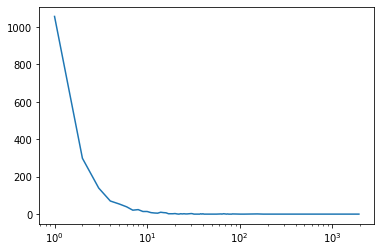

In [806]:
tag_df['count'].value_counts().sort_index().plot(logx=True)

#### Deciding on the dimension of the embedding

The number of 3 seems to provide an elbow point for the remained tags for embedding

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\461701484.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs.append(len(tag_df[tag_df['count']>i][tag_df['count']<200]))


<AxesSubplot:>

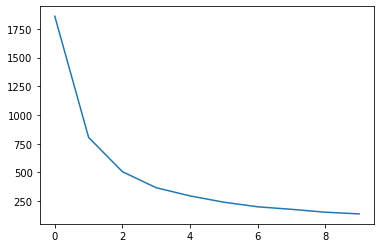

In [874]:
xs = []
for i in range(10):
    xs.append(len(tag_df[tag_df['count']>i][tag_df['count']<200]))
pd.Series(xs).plot()

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\2378390123.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tag_df[tag_df['count']>3][tag_df['count']<200]['count'].value_counts().sort_index().plot()


<AxesSubplot:>

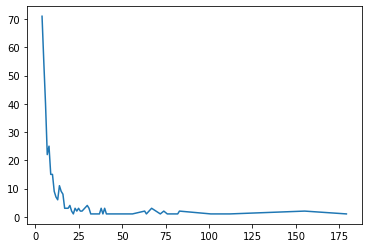

In [875]:
tag_df[tag_df['count']>3][tag_df['count']<200]['count'].value_counts().sort_index().plot()

A total of 366 tags remained in the embedding after filtering

In [808]:
tag_emb = tag_df[tag_df['count']>3][tag_df['count']<200]

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\3099482604.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tag_emb = tag_df[tag_df['count']>3][tag_df['count']<200]


In [809]:
tag_emb['edge_l'] = tag_emb['origin'].apply(lambda x: list(x))

C:\Users\zzbn1\AppData\Local\Temp\ipykernel_23740\1866734054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tag_emb['edge_l'] = tag_emb['origin'].apply(lambda x: list(x))


In [876]:
tag_emb

,count,origin,edge_l
city,179,"{1544, 1547, 2059, 13, 2572, 1559, 2074, 1563,...","[1544, 1547, 2059, 13, 2572, 1559, 2074, 1563,..."
europe,155,"{512, 513, 514, 1544, 2057, 1547, 2059, 529, 5...","[512, 513, 514, 1544, 2057, 1547, 2059, 529, 5..."
church,155,"{4873, 2058, 18, 787, 3107, 2605, 2614, 2360, ...","[4873, 2058, 18, 787, 3107, 2605, 2614, 2360, ..."
architecture,112,"{2320, 787, 2605, 4144, 3901, 4926, 4414, 4928...","[2320, 787, 2605, 4144, 3901, 4926, 4414, 4928..."
canalgrande,101,"{4608, 4609, 4610, 3588, 1542, 1543, 1546, 155...","[4608, 4609, 4610, 3588, 1542, 1543, 1546, 155..."
...,...,...,...
r,4,"{2632, 482, 483, 213}","[2632, 482, 483, 213]"
rust,4,"{2393, 3005, 2903}","[2393, 3005, 2903]"
sesteresanmarco,4,"{3992, 4154, 1749, 3597}","[3992, 4154, 1749, 3597]"
verde,4,"{2393, 3005, 2734, 2519}","[2393, 3005, 2734, 2519]"


#### Constructing a Bipartite Graph for effective mapping of tag embedding

In [738]:
import networkx as nx

In [810]:
G=nx.from_dict_of_lists(tag_emb.to_dict()['edge_l'])

In [811]:
nx.is_bipartite(G)

True

In [812]:
emb_temp = nx.to_pandas_adjacency(G, dtype=int)

Filter out the tags with only one letter would result a tag embedding dimension of 347

In [813]:
tags = list(tag_emb.index)

In [924]:
tags_n = [w for w in tags if len(w)>2]

In [926]:
len(pd.Series(tags_n).apply(lambda x : x.lower()).unique())

347

In [925]:
tags_n

['city',
 'europe',
 'church',
 'architecture',
 'canalgrande',
 'water',
 'canal',
 'urban',
 'sanmarco',
 'dorsoduro',
 'provinzvenedig',
 'gondola',
 'italianrepublic',
 'italian republic',
 'mediterranean',
 'museum',
 'venetianrepublic',
 'sestieri',
 'byerwin',
 'night',
 'ber',
 'street',
 'cannaregio',
 'biennale',
 'cityscape',
 'rialto',
 'canon',
 'travel',
 'channel',
 'reflection',
 'santamariadellacarit',
 'accademia',
 'bridge',
 'galleriedell',
 'art',
 'murano',
 'nikon',
 'giudecca',
 'fuji movie',
 'town',
 'fujinon',
 'car',
 'marci',
 'mosaic',
 'boat',
 'piazzasanmarco',
 'basilicadisanmarco',
 'sony',
 'sanpolo',
 'sonyalpha',
 'baroque',
 'san',
 'basilica',
 'sunset',
 'markusdom',
 'watercourse',
 'sangiorgiomaggiore',
 'castello',
 'sestierecastello',
 'eos',
 'ponte',
 'house',
 'gothic',
 'holidays',
 'people',
 'palaces',
 'fullframe',
 'palazzo',
 'gothicstyle',
 'leica',
 'select',
 'canoneos',
 'unesco',
 'landscape',
 'herbst',
 'outside',
 'ducal pala

#### Tags embedding for data samples

As results, the 347-dimensional tags embedding could be mapped back to 1104 data points. Note that the duplicated data points in terms of text data are not considered.

In [927]:
tags_emb = emb_temp.loc[tags_n].T.loc[~emb_temp.index.isin(tags)].sort_index()

In [928]:
tags_emb

,city,europe,church,architecture,canalgrande,water,canal,urban,sanmarco,dorsoduro,...,painting,veniceitaly,cell,symmetry,sunrise,graphics,rust,sesteresanmarco,verde,sightseeing
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4982,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4983,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4984,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [929]:
tags_VEC = tags_emb.apply(lambda x: np.array(x), axis=1).rename('VECTOR')

In [930]:
tags_VEC

3       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13      [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
15      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
4981    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4982    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4983    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4984    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4985    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: VECTOR, Length: 1104, dtype: object

#### A subset with complet tag embeddings

In [931]:
sub = final_df.merge(tags_VEC, how='right', left_index=True, right_index=True)

In [932]:
sub

,index,candownload,url_c,url_q,url_n,url_largest,owner,owner_loc,title,description,...,week,unique_week,English,Italian,Other_Lang,num_sent,revised_text,text_data,text_len,VECTOR
3,51870743082,1,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,https://live.staticflickr.com/65535/5187074308...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,40,202140,1.0,0.0,0.0,1.0,"It has tags of adriaticsea, italy, venice, bri...","Venice, Italy. It has title of .... It has tag...",9.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,51871789478,1,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,https://live.staticflickr.com/65535/5187178947...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,40,202140,1.0,0.0,0.0,1.0,"It has tags of adriaticsea, italy, venice","Venice, Italy. It has title of .... It has tag...",7.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,51870742942,1,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,https://live.staticflickr.com/65535/5187074294...,47954272@N06,"Tallinn, Estonia",...,"Venice, Italy",...,40,202140,1.0,0.0,0.0,1.0,"It has tags of adriaticsea, italy, venice, water","Venice, Italy. It has title of .... It has tag...",8.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13,51863124066,1,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,https://live.staticflickr.com/65535/5186312406...,186704588@N07,NaN,Venice - Ponte dei Sospiri,Ponte dei Sospiri. Il ponte dei Sospiri fu rea...,...,3,202203,0.0,1.0,0.0,10.0,Bridge of Sighs. The Bridge of Sighs was built...,Ponte dei Sospiri. Il ponte dei Sospiri fu rea...,184.0,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
15,51860573333,1,https://live.staticflickr.com/65535/5186057333...,https://live.staticflickr.com/65535/5186057333...,https://live.staticflickr.com/65535/5186057333...,https://live.staticflickr.com/65535/5186057333...,61033692@N00,NaN,A Murano,"Murano, Venice, Italy",...,1,202201,0.0,1.0,1.0,3.0,"Murano, Venice, Italy. It has tags of murano, ...","Murano, Venice, Italy. It has title of A Muran...",34.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,51233430558,1,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,https://live.staticflickr.com/65535/5123343055...,83293103@N00,"Milano, Italy",20210520_145859,NaN,...,20,202120,0.0,1.0,0.0,1.0,"It has tags of biennale, architecture, archite...",. It has title of 20210520_145859. It has tags...,9.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4982,51234286630,1,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,https://live.staticflickr.com/65535/5123428663...,83293103@N00,"Milano, Italy",20210520_145745,NaN,...,20,202120,0.0,1.0,0.0,1.0,"It has tags of biennale, architecture, archite...",. It has title of 20210520_145745. It has tags...,9.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4983,51234294135,1,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,https://live.staticflickr.com/65535/5123429413...,83293103@N00,"Milano, Italy",20210520_164727,NaN,...,20,202120,0.0,1.0,0.0,1.0,"It has tags of biennale, architecture, archite...",. It has title of 20210520_164727. It has tags...,9.0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4984,51234291635,1,https://live.staticflick

### Save the Datasets generated

In [847]:
sentences.to_csv('Venezia/data_storage/sentences.csv',sep='\t')

In [819]:
candidates_new.to_csv('Venezia/data_storage/metadata_unique_text.csv',sep='\t')

In [818]:
final_df.to_csv('Venezia/data_storage/metadata.csv',sep='\t')

In [933]:
tags_emb.to_csv('Venezia/data_storage/tags_embedding.csv',sep='\t')

In [934]:
sub.to_csv('Venezia/data_storage/meta_with_tags.csv',sep='\t')